# SYGNAŁY 2

#### 1. Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej. Przydatne mogą być następujące konstrukcje
   - array = np.genfromtxt(‘spots.txt’)
   - x = max(array)

In [45]:
import numpy as np
from numpy import *
from matplotlib.pyplot import yscale
from scipy.io import wavfile
import scipy.io.wavfile
from numpy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

Tau = 2 * np.pi

In [46]:
def fft_signal(signal, w):
  return fftfreq(len(signal), 1 / w), abs(fft(signal)) * 2 / len(signal)

In [47]:
def plot_fft(signal, w):
  (frequency, y) = fft_signal(signal, w)
  figure = plt.figure(figsize=(14, 6))

  ax = figure.add_subplot(211)
  ax.plot(np.arange(len(signal)), signal, '-')
  ax.set_xlim(0, len(signal))
  ax.set_xlabel('Czas [s]')
  ax.set_ylabel('Amplituda')

  ax = figure.add_subplot(212)
  plt.plot(frequency, y, '-')
  ax.set_xlim(-w / 2, w / 2)
  ax.set_ylim(0)
  ax.set_xlabel('Częstotliwość [Hz]')
  ax.set_ylabel('Amplituda')
  plt.show()
  return (frequency, y)


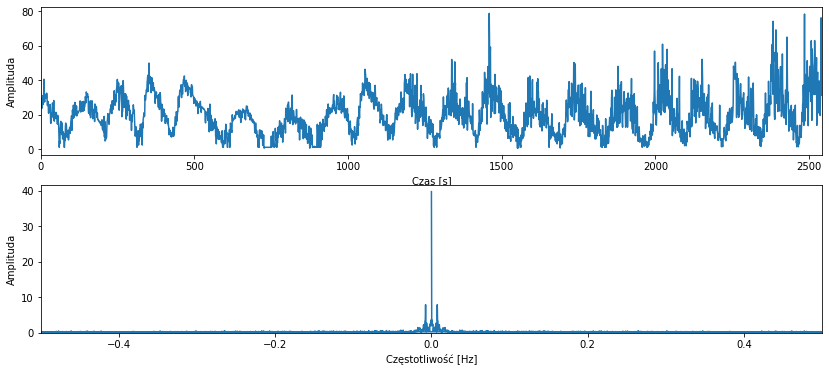

In [48]:
sun = np.genfromtxt("resources/spots.txt")
freq, y = plot_fft(sun, 1)

In [49]:
years = 1 / freq[argmax(y[1:])] // 12
years

11.0

### 2. Proste filtrowanie. Wykreśl sygnał sin(2\*pi\*t) + sin(4\*pi\*t), T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

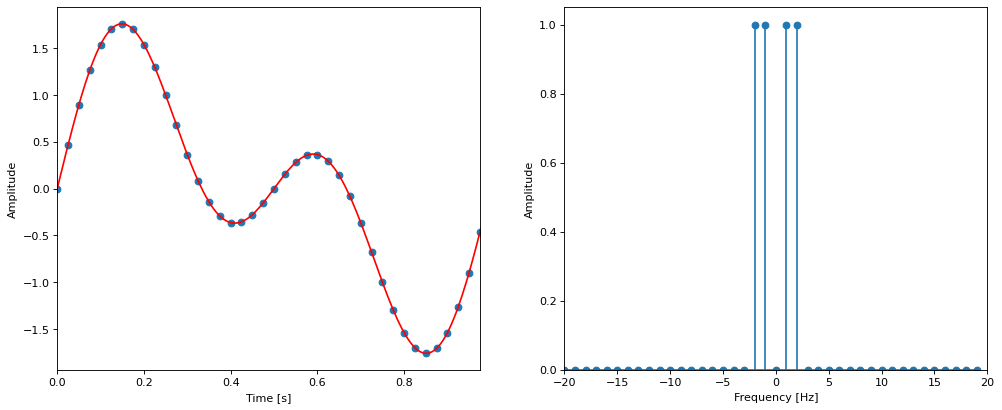

In [50]:

def plot_signal(signal_fn, T=1, LP=1, w=40, x1=0, with_frequency=True):
  # generacja sygnału
  signal_samples_x = arange(x1, LP * T, 1 / w)
  signal_samples_y = signal_fn(signal_samples_x)
  freq, y = fft_signal(signal_samples_y, w)

  if with_frequency:
    signal_x = np.linspace(x1, LP * T, 200)
    signal_y = list(map(signal_fn, signal_x))
    figure = plt.figure(figsize=(15, 6), dpi=80)
    axes = figure.add_subplot(121)
    axes.plot(signal_samples_x, signal_samples_y, 'o')
    axes.plot(signal_x, signal_y, '-', color='red')
    axes.set_xlim(0, signal_samples_x[-1])
    axes.set_xlabel('Time [s]')
    axes.set_ylabel('Amplitude')

    axes = figure.add_subplot(122)
    plt.stem(freq, y, '-*')
    axes.set_xlim(-w / 2, w / 2)
    axes.set_ylim(0)
    axes.set_xlabel('Frequency [Hz]')
    axes.set_ylabel('Amplitude')
    plt.show()
  else:
    ifft_sample = fft(signal_samples_y)
    ifft_sample = ifft_sample[np.where(freq >= 0)]
    xs2 = freq[np.where(freq >= 0)]
    # usuwamy częstotliwości  2 Hz
    ifft_sample[2] = 0
    figure = plt.figure(figsize=(15, 6), dpi=80)
    axes = figure.add_subplot(121)
    axes.plot(xs2, ifft(ifft_sample), linestyle='-', color='red')
    axes.set_ylim([min(ifft(ifft_sample)), max(ifft(ifft_sample))])
    plt.show()

#
signal_fn = lambda t: sin(Tau * t) + sin(2 * Tau * t)
plot_signal(signal_fn, T=1, LP=1, w=40)

c:\users\hououin kyouma\pycharmprojects\kck-laboratory\venv\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\users\hououin kyouma\pycharmprojects\kck-laboratory\venv\lib\site-packages\matplotlib\transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


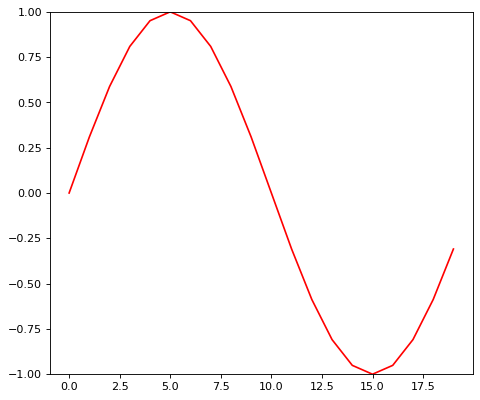

In [51]:
signal_fn = lambda t: sin(Tau * t) + sin(2 * Tau * t)
plot_signal(signal_fn, T=1, LP=1, w=40, with_frequency=False)

### 3. Informacja o fazie. Wykreśl sygnał sin(2\*pi\*t) + sin(4\*pi\*t), T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2\*pi\*t) + cos(4\*pi\*t). Porównaj otrzymane wykresy. Przydatne funkcje (działają także dla tablic):
   - atan2(z)
   - z.imag
   - z.real

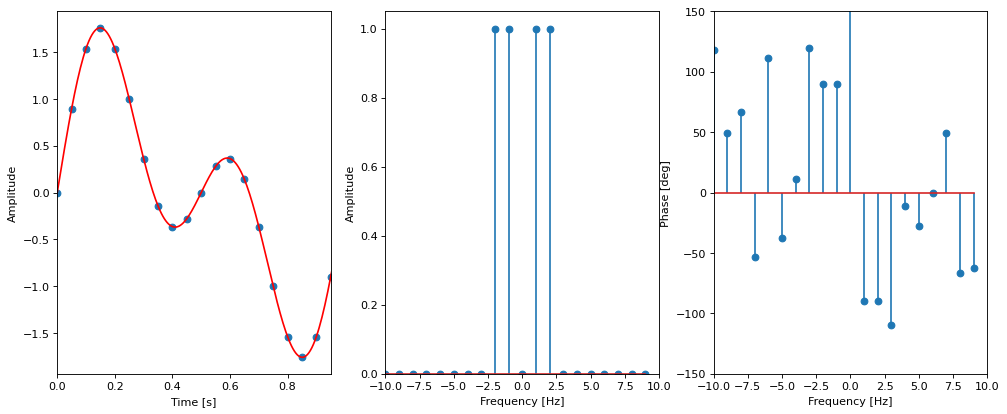

In [52]:
def plot_phase(signal_fn, LP, T, w, x1=0):
  xs1 = np.arange(x1, LP * T, 1 / w)
  ys1 = signal_fn(xs1)
  N = len(ys1)

  xs2 = linspace(x1, LP * T, 200)
  ys2 = list(map(signal_fn, xs2))


  figure = plt.figure(figsize=(15, 6), dpi=80)
  axes = figure.add_subplot(131)
  axes.plot(xs1, ys1, 'o')
  axes.plot(xs2, ys2, '-', color='red')
  axes.set_xlim(0, xs1[-1])
  axes.set_xlabel('Czas [s]')
  axes.set_ylabel('Amplituda')

  xs3 = fftfreq(N, 1 / w)
  ys3 = abs(fft(ys1)) * 2 / N

  axes = figure.add_subplot(132)
  plt.stem(xs3, ys3, '-*')
  axes.set_xlim(-w / 2, w / 2)
  axes.set_ylim(0)
  axes.set_xlabel('Częstotliwość [Hz]')
  axes.set_ylabel('Amplituda')

  axes = figure.add_subplot(133)

  ys4 = angle(fft(ys1), deg=True)

  plt.stem(xs3, ys4, '-*')
  axes.set_xlim(-w / 2, w / 2)
  axes.set_ylim(-150, 150)
  axes.set_xlabel('Częstotliwość [Hz]')
  axes.set_ylabel('Faza [deg]')
  plt.show()

signal_fn = lambda t: sin(Tau * t) + np.sin(2 * Tau * t)
plot_phase(signal_fn, 1, 1, 20)


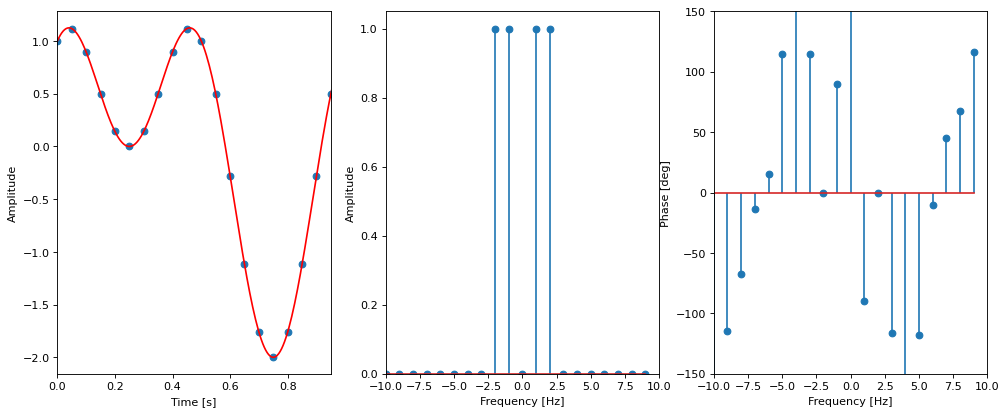

In [53]:
signal_fn = lambda t: sin(Tau * t) + cos(2 * Tau * t)
plot_phase(signal_fn, 1, 1, 20)

### 4. Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:
   - import scipy.io.wavfile
   - w, signal = scipy.io.wavfile.read('resources/err.wav')
   - signal = [s[0] for s in signal] #Tylko pierwszy kanał
   - yscale(‘log’)
   - spectrum[::10]  # co 10­ty element

44100 Hz


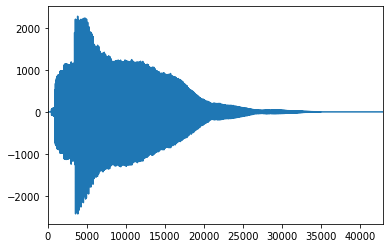

In [54]:
w, signal = wavfile.read('resources/err.wav')
signal = [s[0] for s in signal]
plt.plot(signal)
plt.xlim(0, len(signal))
print(w, 'Hz')

44100 Hz


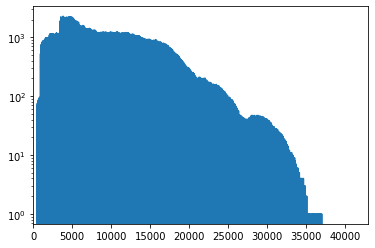

In [55]:
w, signal = wavfile.read('resources/err.wav')
signal = [s[0] for s in signal]
yscale('log')
plt.plot(signal)
plt.xlim(0, len(signal))
print(w, 'Hz')

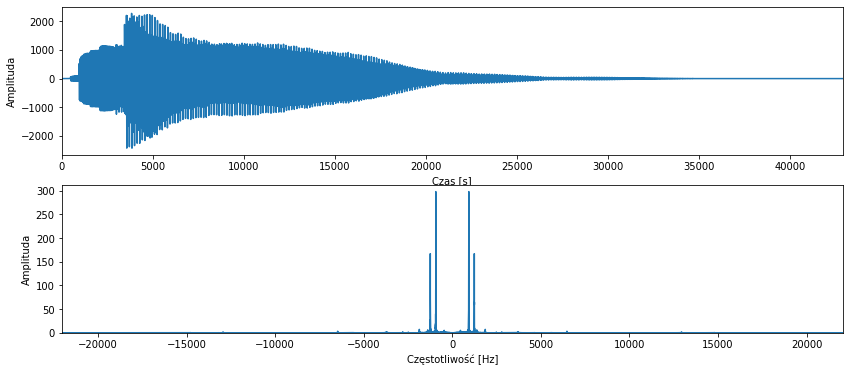

(array([ 0.        ,  1.02845149,  2.05690299, ..., -3.08535448,
        -2.05690299, -1.02845149]),
 array([0.00209888, 0.00982433, 0.03450868, ..., 0.04639319, 0.03450868,
        0.00982433]))

In [56]:
plot_fft(signal, 44100)

### 5. Za pomocą fft można efektywnie mnożyć duże liczby (lub np. wielomiany). Sprawdź poniższ obliczenia. Jaka jest złożoność obliczeniowa następującej operacji? Uwaga: aby wykonać obliczenia dla większych cyfr, trzeba zaprogramować “promocję” np. [1,2]*[0,6]=[0,6,12], co znaczy [0,6+1,2]=[0,7,2].

In [57]:
def promotion(result: list) -> list:
  for i in range(len(result)):
    if result[i] >= 10:
      result[i] -= 10
      if i == 0:
        result.insert(0, 0)
        result[i] += 1
      result[i - 1] += + 1
  return result

a = [1, 2, 3]
b = [1, 2]

A = fft.fft(a, 4)
B = fft.fft(b, 4)
C = A * B
promotion(abs(ifft(C)))

AttributeError: 'function' object has no attribute 'fft'